In [55]:
%reload_ext autoreload
%autoreload 2

from helpers import *
from spice_net import *

import numpy as np
import networkx as nxs
import tqdm
import random
import json

import PySpice
PySpice.Spice.Simulation.CircuitSimulator.DEFAULT_SIMULATOR = "ngspice-shared" 
import PySpice.Spice.NgSpice.Server
PySpice.Spice.NgSpice.Server.SpiceServer.SPICE_COMMAND = 'ngspice'

In [56]:
import PySpice.Spice.NgSpice.Shared

instance = PySpice.Spice.NgSpice.Shared.NgSpiceShared.new_instance()

In [57]:
data = np.load("../data/xor_train_data_no_scale.npz")

In [60]:
def make_test_net(size, instance):
    seed = 0

    grid_size = size

    np.random.seed(seed)

    grid_graph = nx.grid_graph([grid_size, grid_size], periodic=True)
    # grid_graph.add_node((-1, -1))

    for e in grid_graph.edges:
        # grid_graph[e[0]][e[1]]['weight'] = 0.5                           # init to max value
        grid_graph[e[0]][e[1]]['weight'] = random.uniform(0.1, 0.9)       # random value

    node_cfg = (np.array([[5, 16], [7, 16], [13, 16], [15, 16]]), np.array([[10, 0]]))
    net: TransistorNetwork = TransistorNetwork("profiling", con_graph=grid_graph, node_cfg=node_cfg, solver='ngspice-shared', epsilon=1e-16)
    return net

In [61]:
net = make_test_net(4, instance)

In [62]:
net.__nodes__

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15']

In [63]:
simulator = net.cached_simulator

In [64]:
# simulator.node_set(**{"0": 5})

In [65]:
net._prepare_simulation(data["inputs"])

In [66]:
res = net._run_simulation()

Using SPARSE 1.3 as Direct Linear Solver


In [67]:
print(res.simulation)

.title profiling
.subckt transistor_edge t_D t_S vgs=0.5
V1 t_G t_S {vgs}
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.ends transistor_edge
B1 5 16 v={pwl(V(index), 1, 0, 2, 0, 3, 0, 4, 0)}
B2 7 16 v={pwl(V(index), 1, 1, 2, 1, 3, 1, 4, 1)}
B3 13 16 v={pwl(V(index), 1, 0, 2, 0, 3, 1, 4, 1)}
B4 15 16 v={pwl(V(index), 1, 0, 2, 1, 3, 0, 4, 1)}
Vindex index 0 1
X1 0 4 transistor_edge vgs=0.45976935214213066
X2 0 12 transistor_edge vgs=0.5420273630173748
X3 0 1 transistor_edge vgs=0.5363466818512758
X4 0 3 transistor_edge vgs=0.7015198487013123
X5 1 5 transistor_edge vgs=0.36836539892775577
X6 1 13 transistor_edge vgs=0.5249503305958497
X7 1 2 transistor_edge vgs=0.20058870823414576
X8 2 6 transistor_edge vgs=0.8480515586685128
X9 2 14 transistor_edge vgs=0.4491520216529692
X10 2 3 transistor_edge vgs=0.8791239498852327
X11 3 7 transistor_edge vgs=0.7231081540271446
X12 3 15 transistor_edge vgs=0.5646170407057078
X13 4 8 transistor_edge vgs=0.21198195699704867
X14 4 5 transistor_edge vgs=0.562

In [68]:
res.nodes.get("1")

WaveForm 1 [-0.18557341 -0.2710225   0.05873656  0.00401261]@V

In [69]:
simulator.options("KLU")
# simulator.options("Sparse")

In [70]:
del simulator._options['Sparse']

KeyError: 'Sparse'

In [71]:
print(simulator)

.title profiling
.subckt transistor_edge t_D t_S vgs=0.5
V1 t_G t_S {vgs}
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.ends transistor_edge
B1 5 16 v={pwl(V(index), 1, 0, 2, 0, 3, 0, 4, 0)}
B2 7 16 v={pwl(V(index), 1, 1, 2, 1, 3, 1, 4, 1)}
B3 13 16 v={pwl(V(index), 1, 0, 2, 0, 3, 1, 4, 1)}
B4 15 16 v={pwl(V(index), 1, 0, 2, 1, 3, 0, 4, 1)}
Vindex index 0 1
X1 0 4 transistor_edge vgs=0.45976935214213066
X2 0 12 transistor_edge vgs=0.5420273630173748
X3 0 1 transistor_edge vgs=0.5363466818512758
X4 0 3 transistor_edge vgs=0.7015198487013123
X5 1 5 transistor_edge vgs=0.36836539892775577
X6 1 13 transistor_edge vgs=0.5249503305958497
X7 1 2 transistor_edge vgs=0.20058870823414576
X8 2 6 transistor_edge vgs=0.8480515586685128
X9 2 14 transistor_edge vgs=0.4491520216529692
X10 2 3 transistor_edge vgs=0.8791239498852327
X11 3 7 transistor_edge vgs=0.7231081540271446
X12 3 15 transistor_edge vgs=0.5646170407057078
X13 4 8 transistor_edge vgs=0.21198195699704867
X14 4 5 transistor_edge vgs=0.562

In [72]:
print(net)

.title profiling
.subckt transistor_edge t_D t_S vgs=0.5
V1 t_G t_S {vgs}
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.ends transistor_edge
B1 5 16 v={pwl(V(index), 1, 0, 2, 0, 3, 0, 4, 0)}
B2 7 16 v={pwl(V(index), 1, 1, 2, 1, 3, 1, 4, 1)}
B3 13 16 v={pwl(V(index), 1, 0, 2, 0, 3, 1, 4, 1)}
B4 15 16 v={pwl(V(index), 1, 0, 2, 1, 3, 0, 4, 1)}
Vindex index 0 1
X1 0 4 transistor_edge vgs=0.45976935214213066
X2 0 12 transistor_edge vgs=0.5420273630173748
X3 0 1 transistor_edge vgs=0.5363466818512758
X4 0 3 transistor_edge vgs=0.7015198487013123
X5 1 5 transistor_edge vgs=0.36836539892775577
X6 1 13 transistor_edge vgs=0.5249503305958497
X7 1 2 transistor_edge vgs=0.20058870823414576
X8 2 6 transistor_edge vgs=0.8480515586685128
X9 2 14 transistor_edge vgs=0.4491520216529692
X10 2 3 transistor_edge vgs=0.8791239498852327
X11 3 7 transistor_edge vgs=0.7231081540271446
X12 3 15 transistor_edge vgs=0.5646170407057078
X13 4 8 transistor_edge vgs=0.21198195699704867
X14 4 5 transistor_edge vgs=0.562

In [73]:
instance.set("R1 1 0 1")

In [74]:
print(instance.listing)

<bound method NgSpiceShared.listing of <PySpice.Spice.NgSpice.Shared.NgSpiceShared object at 0x1053363a0>>


In [75]:
print(net)

.title profiling
.subckt transistor_edge t_D t_S vgs=0.5
V1 t_G t_S {vgs}
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.ends transistor_edge
B1 5 16 v={pwl(V(index), 1, 0, 2, 0, 3, 0, 4, 0)}
B2 7 16 v={pwl(V(index), 1, 1, 2, 1, 3, 1, 4, 1)}
B3 13 16 v={pwl(V(index), 1, 0, 2, 0, 3, 1, 4, 1)}
B4 15 16 v={pwl(V(index), 1, 0, 2, 1, 3, 0, 4, 1)}
Vindex index 0 1
X1 0 4 transistor_edge vgs=0.45976935214213066
X2 0 12 transistor_edge vgs=0.5420273630173748
X3 0 1 transistor_edge vgs=0.5363466818512758
X4 0 3 transistor_edge vgs=0.7015198487013123
X5 1 5 transistor_edge vgs=0.36836539892775577
X6 1 13 transistor_edge vgs=0.5249503305958497
X7 1 2 transistor_edge vgs=0.20058870823414576
X8 2 6 transistor_edge vgs=0.8480515586685128
X9 2 14 transistor_edge vgs=0.4491520216529692
X10 2 3 transistor_edge vgs=0.8791239498852327
X11 3 7 transistor_edge vgs=0.7231081540271446
X12 3 15 transistor_edge vgs=0.5646170407057078
X13 4 8 transistor_edge vgs=0.21198195699704867
X14 4 5 transistor_edge vgs=0.562

In [76]:
netlist_working = """.title profiling
.subckt Transistor_edge t_D t_S vgs=0.5
V1 t_G t_S {vgs}
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.ends Transistor_edge
B1 5 16 v={pwl(V(index), 1, 0, 2, 0, 3, 0, 4, 0)}
B2 7 16 v={pwl(V(index), 1, 1, 2, 1, 3, 1, 4, 1)}
B3 13 16 v={pwl(V(index), 1, 0, 2, 0, 3, 1, 4, 1)}
B4 15 16 v={pwl(V(index), 1, 0, 2, 1, 3, 0, 4, 1)}
Vindex index 0 1
X1 0 4 Transistor_edge vgs=0.8874343980143751
X2 0 12 Transistor_edge vgs=0.8358970836680764
X3 0 1 Transistor_edge vgs=0.7413359387902915
X4 0 3 Transistor_edge vgs=0.6583504750281912
X5 1 5 Transistor_edge vgs=0.6616575857158946
X6 1 13 Transistor_edge vgs=0.731748132020153
X7 1 2 Transistor_edge vgs=0.15614424350195
X8 2 6 Transistor_edge vgs=0.31938856484448064
X9 2 14 Transistor_edge vgs=0.655834754228172
X10 2 3 Transistor_edge vgs=0.8736295367973443
X11 3 7 Transistor_edge vgs=0.6685358763067845
X12 3 15 Transistor_edge vgs=0.364113251499088
X13 4 8 Transistor_edge vgs=0.6242000477369204
X14 4 5 Transistor_edge vgs=0.24557864051954095
X15 4 7 Transistor_edge vgs=0.7406151196806426
X16 5 9 Transistor_edge vgs=0.505310017121289
X17 5 6 Transistor_edge vgs=0.15366741372032955
X18 6 10 Transistor_edge vgs=0.7700203230211216
X19 6 7 Transistor_edge vgs=0.3407712255401122
X20 7 11 Transistor_edge vgs=0.5390142860831738
X21 8 12 Transistor_edge vgs=0.48559263332873215
X22 8 9 Transistor_edge vgs=0.852166489062404
X23 8 11 Transistor_edge vgs=0.2969576126643698
X24 9 13 Transistor_edge vgs=0.7393569224082929
X25 9 10 Transistor_edge vgs=0.8605672302569335
X26 10 14 Transistor_edge vgs=0.2413328157499259
X27 10 11 Transistor_edge vgs=0.35737823769485577
X28 11 15 Transistor_edge vgs=0.8692794931088055
X29 12 13 Transistor_edge vgs=0.5822264816460255
X30 12 15 Transistor_edge vgs=0.22397025616823438
X31 13 14 Transistor_edge vgs=0.7782261830990683
X32 14 15 Transistor_edge vgs=0.10635244768863866
.model Ideal NMOS (level=1)
.options TEMP = 27C
.options TNOM = 27C
.end

"""

## Benchmarks below

In [130]:
# number of netlist lines
len(str(net).split("\n"))

47

In [133]:
# initialize statistics
statistics = {}

netlist_fields = ['Subckt and Param expansion time','Netlist parsing time']
loading_fields = ['Netlist loading time','Matrix load time','Transient load time']
matrix_fields = ['Matrix synchronize time','Matrix reorder time','Matrix factor time','Matrix solve time']
misc_fields = ['Total analysis time (seconds)', 'Total iterations', 'Transient iterations', 'Circuit Equations','Circuit original non-zeroes','Circuit fill-in non-zeroes', 'Circuit total non-zeroes']
tran_fields = ['Transient Timepoints', 'Accepted timepoints', 'Rejected timepoints','Transient analysis time',
 'Transient load time',
 'Transient sync time',
 'Transient factor time',
 'Transient solve time',
 'Transient trunc time',
 'Transient iterations for the last time point',]
all_fields = netlist_fields + loading_fields + matrix_fields + misc_fields + tran_fields

In [135]:
instance.ressource_usage()

{'Total elapsed time (seconds)': 139264.706,
 'elapsed time since last call (seconds)': 25.448,
 'Total DRAM available': '16384.000 MB.',
 'DRAM currently available': '  74.688 MB.',
 'Maximum ngspice program size': '0 bytes.',
 'Current ngspice program size': '  71.297 MB.',
 'Number of lines in the deck': 210,
 'Netlist loading time': 0.001,
 'Subckt and Param expansion time': 0,
 'Netlist parsing time': 0,
 'Nominal temperature': 27,
 'Operating temperature': 27,
 'Total iterations': 4,
 'Transient iterations': 0,
 'Circuit Equations': 87,
 'Circuit original non-zeroes': 369,
 'Circuit fill-in non-zeroes': 96,
 'Circuit total non-zeroes': 0,
 'Transient timepoints': 0,
 'Accepted timepoints': 0,
 'Rejected timepoints': 0,
 'Total analysis time (seconds)': 0.001,
 'Matrix load time': 0,
 'Matrix synchronize time': 0,
 'Matrix reorder time': 0,
 'Matrix factor time': 0,
 'Matrix solve time': 0,
 'Transient analysis time': 0,
 'Transient load time': 0,
 'Transient sync time': 0,
 'Tran

In [136]:
NET_SIZES = [4, 10, 20, 30, 50]
n_iters = 100

In [95]:
for size in tqdm.tqdm(NET_SIZES[::-1]):
    statistics[size] = {}

    instance.remove_circuit()
    net = make_test_net(size, instance)
    statistics[size]['Netlist lines'] = len(str(net).split("\n"))
    for i in tqdm.tqdm(range(n_iters), leave=False):
        res =  net.solve(data['inputs'][0])
        for i, v in enumerate(res):
            net.cached_simulator.node_set(**{str(i): v[0]})
        
        for field in all_fields:
            if field not in statistics[size]:
                statistics[size][field] = instance.ressource_usage()[field]
            else:
                statistics[size][field] = (statistics[size][field] * i + instance.ressource_usage()[field]) / (i + 1)

        


  0%|          | 0/5 [00:00<?, ?it/s]Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as Direct Linear Solver
Using SPARSE 1.3 as 

In [83]:
res

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00117068, -0.00528546, -0.00962385, -0.01333502],
       [-0.00599548, -0.0189033 , -0.0342652 , -0.04604936],
       ...,
       [-0.0007206 ,  0.01093904,  0.02028633,  0.03110146],
       [ 0.00078189,  0.0085313 ,  0.01479982,  0.02181854],
       [ 0.00178727,  0.00678091,  0.01059431,  0.01494312]])

In [13]:
instance.ressource_usage()

{'Total elapsed time (seconds)': 73.923,
 'elapsed time since last call (seconds)': 3.844,
 'Total DRAM available': '16384.000 MB.',
 'DRAM currently available': '  54.984 MB.',
 'Maximum ngspice program size': '0 bytes.',
 'Current ngspice program size': ' 598.094 MB.',
 'Number of lines in the deck': 207,
 'Netlist loading time': 0,
 'Subckt and Param expansion time': 0.001,
 'Netlist parsing time': 0.001,
 'Nominal temperature': 27,
 'Operating temperature': 27,
 'Total iterations': 42,
 'Transient iterations': 0,
 'Circuit Equations': 87,
 'Circuit original non-zeroes': 373,
 'Circuit fill-in non-zeroes': 157,
 'Circuit total non-zeroes': 530,
 'Transient timepoints': 0,
 'Accepted timepoints': 0,
 'Rejected timepoints': 0,
 'Total analysis time (seconds)': 0.001,
 'Matrix load time': 0,
 'Matrix synchronize time': 0,
 'Matrix reorder time': 0,
 'Matrix factor time': 0.001,
 'Matrix solve time': 0,
 'Transient analysis time': 0,
 'Transient load time': 0,
 'Transient sync time': 0,

In [107]:
!ls 

__pycache__                    profiling_globaldef.json
analytic.ipynb                 profiling_globaldef_cache.json
analyze_results.ipynb          profiling_globaldef_klu.json
circuit_classification.ipynb   profiling_param_subckt.json
create_datasets.py             pyspice_playground.ipynb
feasible_region.ipynb          source_reference.ipynb
gen_data.ipynb                 spice.ipynb
landscape.ipynb                spice_profiling.ipynb
linear_classification.ipynb    stationary_points.ipynb
linear_regression.ipynb        test_twin_edge.ipynb
network_sweep.ipynb            test_xor.ipynb
ngspice_benchmark.ipynb        train_nets.py
nonlinear_classification.ipynb transistor_grid.ipynb
nonlinear_regression.ipynb     transistor_networks.ipynb
optim.ipynb                    update_rule.ipynb
profiling_baseline.json        voltage_divider.ipynb


In [125]:
# uncomment to save results
EXPERIMENT_NAME = "profiling_globaldef"
# with open(f"{EXPERIMENT_NAME}.json", "w") as f:
#     json.dump(statistics, f)

In [126]:
with open(f"{EXPERIMENT_NAME}.json", "r") as f:
    statistics = json.load(f)

## Data visualization

Text(0.5, 1.0, 'Netlist size vs. total solver iterations (steady state analysis)')

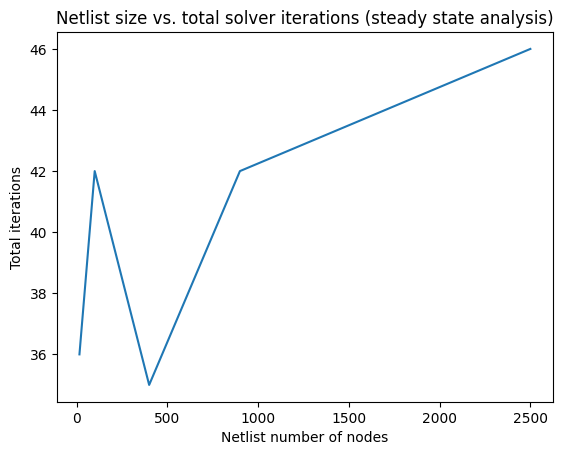

In [127]:
# plot netlist size vs. total iterations
import matplotlib.pyplot as plt
plt.plot([ss**2 for ss in NET_SIZES], [s['Total iterations'] for s in statistics.values()])
plt.xlabel("Netlist number of nodes")
plt.ylabel("Total iterations")
plt.title("Netlist size vs. total solver iterations (steady state analysis)")

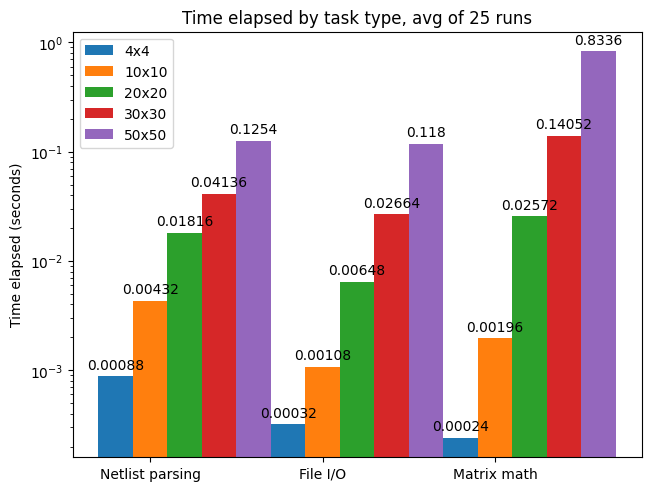

In [128]:
import matplotlib.pyplot as plt 

netlist_fields = ['Subckt and Param expansion time','Netlist parsing time']
loading_fields = ['Netlist loading time','Matrix load time','Transient load time']
matrix_fields = ['Matrix synchronize time','Matrix reorder time','Matrix factor time','Matrix solve time']

# grouped bar chart of size vs. time for each field
stat_totals = {
    size: [sum(statistics[str(size)][field] for field in netlist_fields),
    sum(statistics[str(size)][field] for field in loading_fields),
    sum(statistics[str(size)][field] for field in matrix_fields)]
    for size in NET_SIZES
}
all_fields = list(set(netlist_fields + loading_fields + matrix_fields))
trial_data = stat_totals

task_type = {"Netlist parsing": netlist_fields, "File I/O": loading_fields, "Matrix math": matrix_fields}

x = np.arange(len(task_type))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in trial_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=f"{attribute}x{attribute}")
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time elapsed (seconds)')
ax.set_title(f'Time elapsed by task type, avg of {n_iters} runs')
ax.set_xticks(x + width, task_type.keys())
ax.legend(loc='upper left', ncols=1)
# ax.set_ylim(0, 3.5)
# y axis log scale
ax.set_yscale('log')

plt.show()

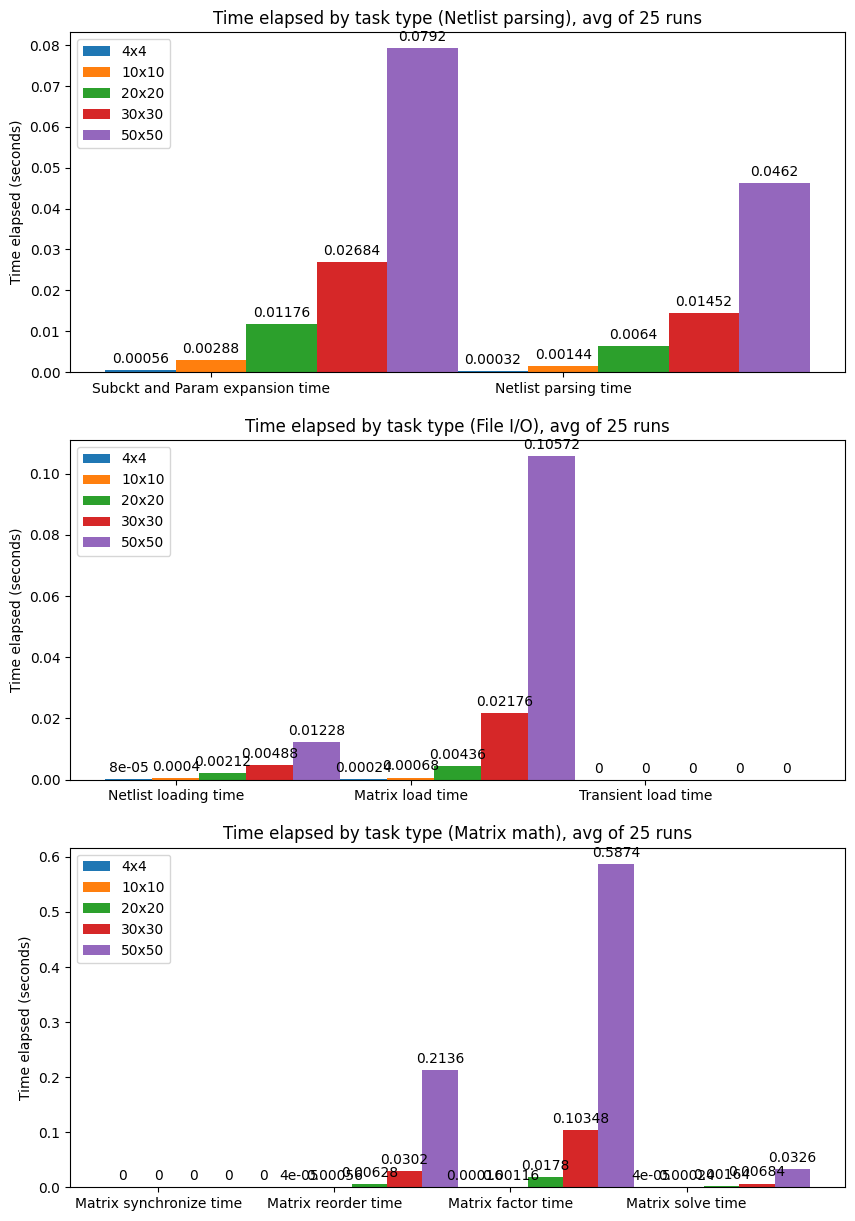

In [129]:
import matplotlib.pyplot as plt 

# grouped bar chart of size vs. time for each field
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, (category, fields) in enumerate(zip(["Netlist parsing", "File I/O", "Matrix math"], [netlist_fields, loading_fields, matrix_fields])):
    stat_totals = {
        size: [statistics[str(size)][f] for f in fields]
        for size in NET_SIZES
    }

    x = np.arange(len(fields))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    for attribute, measurement in stat_totals.items():
        offset = width * multiplier
        rects = axs[i].bar(x + offset, measurement, width, label=f"{attribute}x{attribute}")
        axs[i].bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel('Time elapsed (seconds)')
    axs[i].set_title(f'Time elapsed by task type ({category}), avg of {n_iters} runs')
    axs[i].set_xticks(x + width, fields)
    axs[i].legend(loc='upper left', ncols=1)
    # axs[i].set_ylim(0, 3)

plt.show()

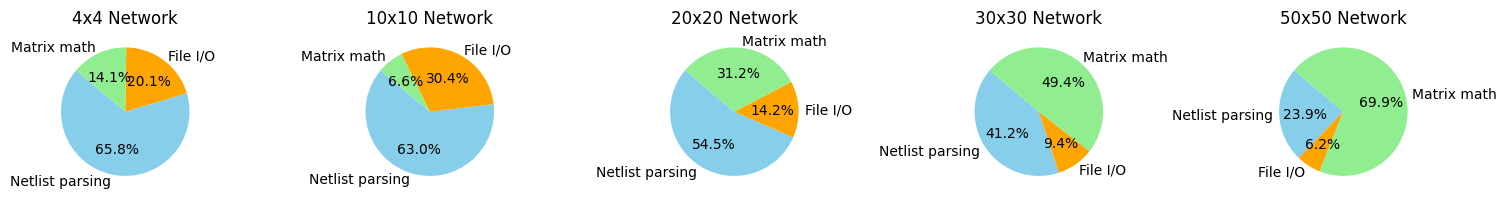

In [101]:
# pie chart showcasing the distribution of time spent on each task
fig, axs = plt.subplots(1, len(NET_SIZES), figsize=(15, 5))

for i, size in enumerate(NET_SIZES):
    # Get the time spent on each task for the current network size
    netlist_time = sum([statistics[str(size)][f] for f in netlist_fields])
    io_time = sum([statistics[str(size)][f] for f in loading_fields])
    math_time = sum([statistics[str(size)][f] for f in matrix_fields])

    # Data to plot
    times = [netlist_time, io_time, math_time]
    labels = ['Netlist parsing', 'File I/O', 'Matrix math']
    colors = ['skyblue', 'orange', 'lightgreen']

    # Plot pie chart
    axs[i].pie(times, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'{size}x{size} Network')

plt.tight_layout()
plt.show()


/var/folders/p1/kynpdwyn2r5fmbpnr8d45m340000gn/T/ipykernel_7180/3987539042.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(all_tasks))  # Generate distinct colors for each task


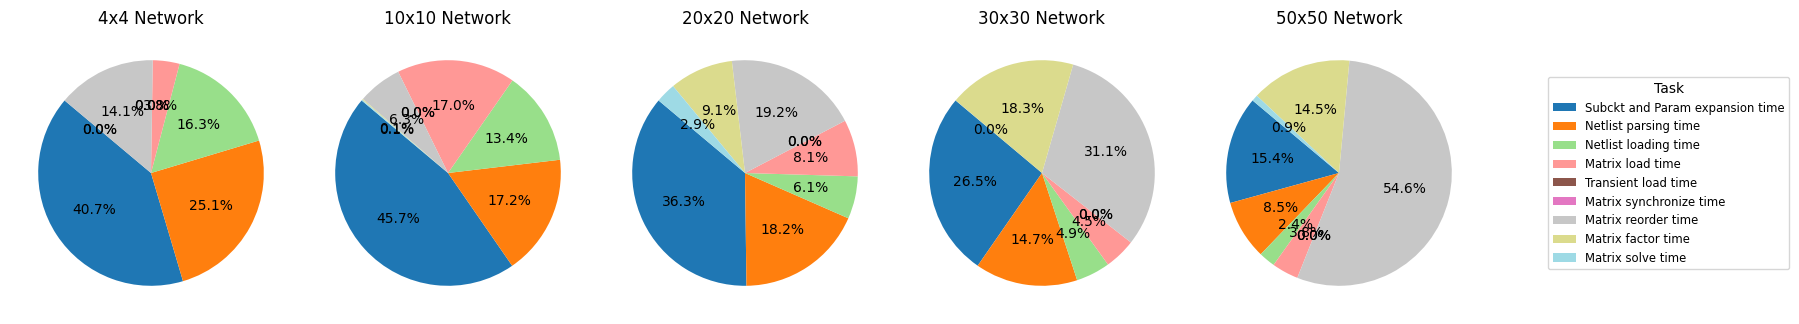

In [102]:
# Assuming `fields` is the list of all tasks (across all categories)
fig, axs = plt.subplots(1, len(NET_SIZES), figsize=(15, 5))

# Get unique task labels from all the fields combined
all_tasks = netlist_fields + loading_fields + matrix_fields
colors = plt.cm.get_cmap('tab20', len(all_tasks))  # Generate distinct colors for each task

for i, size in enumerate(NET_SIZES):
    # Get time spent on each individual task for the current network size
    task_times = {f: statistics[str(size)][f] for f in all_tasks}

    # Data to plot
    times = list(task_times.values())
    labels = list(task_times.keys())

    # Plot pie chart without labels (we'll add a single legend later)
    axs[i].pie(times, autopct='%1.1f%%', startangle=140, colors=colors(range(len(labels))))
    axs[i].set_title(f'{size}x{size} Network')

# Create a single legend
fig.legend(labels, loc="center right", title="Task", bbox_to_anchor=(1.2, 0.5), fontsize='small')

plt.tight_layout()
plt.show()

## Comparing unoptimized vs. optimized code

In [103]:
baseline = json.load(open("profiling_baseline.json"))
opt1 = json.load(open("profiling_param_subckt.json"))
opt2 = json.load(open("profiling_globaldef.json"))
opt3 = json.load(open("profiling_globaldef_klu.json"))

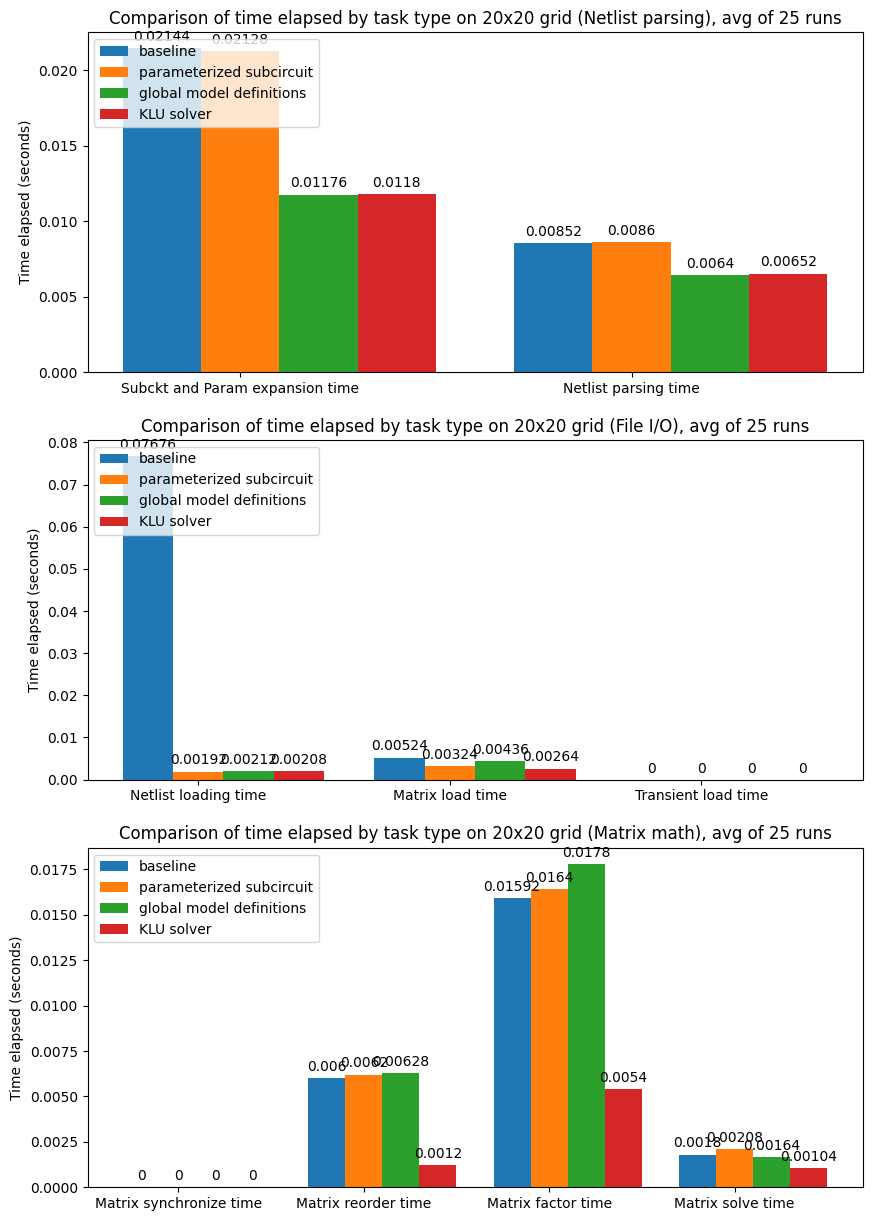

In [104]:
import matplotlib.pyplot as plt 

SIZE = str(20)

# grouped bar chart of size vs. time for each field
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i, (category, fields) in enumerate(zip(["Netlist parsing", "File I/O", "Matrix math"], [netlist_fields, loading_fields, matrix_fields])):
    stat_totals = {
        "baseline": [baseline[SIZE][f] for f in fields],
        "parameterized subcircuit": [opt1[SIZE][f] for f in fields],
        "global model definitions": [opt2[SIZE][f] for f in fields],
        "KLU solver": [opt3[SIZE][f] for f in fields]
    }

    x = np.arange(len(fields))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    for attribute, measurement in stat_totals.items():
        offset = width * multiplier
        rects = axs[i].bar(x + offset, measurement, width, label=f"{attribute}")
        axs[i].bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[i].set_ylabel('Time elapsed (seconds)')
    axs[i].set_title(f'Comparison of time elapsed by task type on {SIZE}x{SIZE} grid ({category}), avg of {n_iters} runs')
    axs[i].set_xticks(x + width, fields)
    axs[i].legend(loc='upper left', ncols=1)
    # axs[i].set_ylim(0, 3)

plt.show()

In [48]:
print(net)

.title profiling
.subckt Transistor_edge t_D t_S vgs=0.5
V1 t_G t_S {vgs}
R1 t_D t_S 1e+16
M1 t_D t_G t_S t_S Ideal
.ends Transistor_edge
B1 5 16
B2 7 16
B3 13 16
B4 15 16
B5 10 0
Vindex index 0 1
X1 0 4 Transistor_edge vgs=0.7968927824135439
X2 0 12 Transistor_edge vgs=0.48858724163023426
X3 0 1 Transistor_edge vgs=0.42243014894537156
X4 0 3 Transistor_edge vgs=0.48861152960974386
X5 1 5 Transistor_edge vgs=0.6519648845056174
X6 1 13 Transistor_edge vgs=0.5936547013034641
X7 1 2 Transistor_edge vgs=0.7158380575322731
X8 2 6 Transistor_edge vgs=0.5917245810592089
X9 2 14 Transistor_edge vgs=0.44292304511321234
X10 2 3 Transistor_edge vgs=0.22025212917592907
X11 3 7 Transistor_edge vgs=0.580824457956858
X12 3 15 Transistor_edge vgs=0.7335786212275416
X13 4 8 Transistor_edge vgs=0.7092544491009302
X14 4 5 Transistor_edge vgs=0.3224879813561745
X15 4 7 Transistor_edge vgs=0.7334275907057738
X16 5 9 Transistor_edge vgs=0.536250666946212
X17 5 6 Transistor_edge vgs=0.5289400787434186
X18 6 

In [19]:
# compare number of equations, matrix nonzeros, and lines of netlist
print("Netlist lines")
print("  Baseline: ", [baseline[str(size)]['Netlist lines'] for size in NET_SIZES])
print("  Parameterized subcircuit: ", [opt1[str(size)]['Netlist lines'] for size in NET_SIZES])
print("  Global model: ", [opt2[str(size)]['Netlist lines'] for size in NET_SIZES])

print("Circuit Equations")
print("  Baseline: ", [baseline[str(size)]['Circuit Equations'] for size in NET_SIZES])
print("  Parameterized subcircuit: ", [opt1[str(size)]['Circuit Equations'] for size in NET_SIZES])
print("  Global model: ", [opt2[str(size)]['Circuit Equations'] for size in NET_SIZES])

print("Circuit original non-zeroes")
print("  Baseline: ", [baseline[str(size)]['Circuit original non-zeroes'] for size in NET_SIZES])
print("  Parameterized subcircuit: ", [opt1[str(size)]['Circuit original non-zeroes'] for size in NET_SIZES])
print("  Global model: ", [opt2[str(size)]['Circuit original non-zeroes'] for size in NET_SIZES])

print("Circuit fill-in non-zeroes")
print("  Baseline: ", [baseline[str(size)]['Circuit fill-in non-zeroes'] for size in NET_SIZES])
print("  Parameterized subcircuit: ", [opt1[str(size)]['Circuit fill-in non-zeroes'] for size in NET_SIZES])
print("  Global model: ", [opt2[str(size)]['Circuit fill-in non-zeroes'] for size in NET_SIZES])

Netlist lines
  Baseline:  [263, 1607, 6407, 14407, 40007]
  Parameterized subcircuit:  [46, 214, 814, 1814, 5014]
  Global model:  [46, 214, 814, 1814, 5014]
Circuit Equations
  Baseline:  [87.0, 506.0, 2006.0, 4506.0, 12506.0]
  Parameterized subcircuit:  [87.0, 506.0, 2006.0, 4506.0, 12506.0]
  Global model:  [87.0, 506.0, 2006.0, 4506.0, 12506.0]
Circuit original non-zeroes
  Baseline:  [373.0, 2305.0, 9205.0, 20705.0, 57505.0]
  Parameterized subcircuit:  [373.0, 2305.0, 9205.0, 20705.0, 57505.0]
  Global model:  [373.0, 2305.0, 9205.0, 20705.0, 57505.0]
Circuit fill-in non-zeroes
  Baseline:  [99.0, 1592.0, 11446.0, 32212.0, 119501.0]
  Parameterized subcircuit:  [99.0, 1592.0, 11446.0, 32212.0, 119501.0]
  Global model:  [99.0, 1592.0, 11446.0, 32212.0, 119501.0]


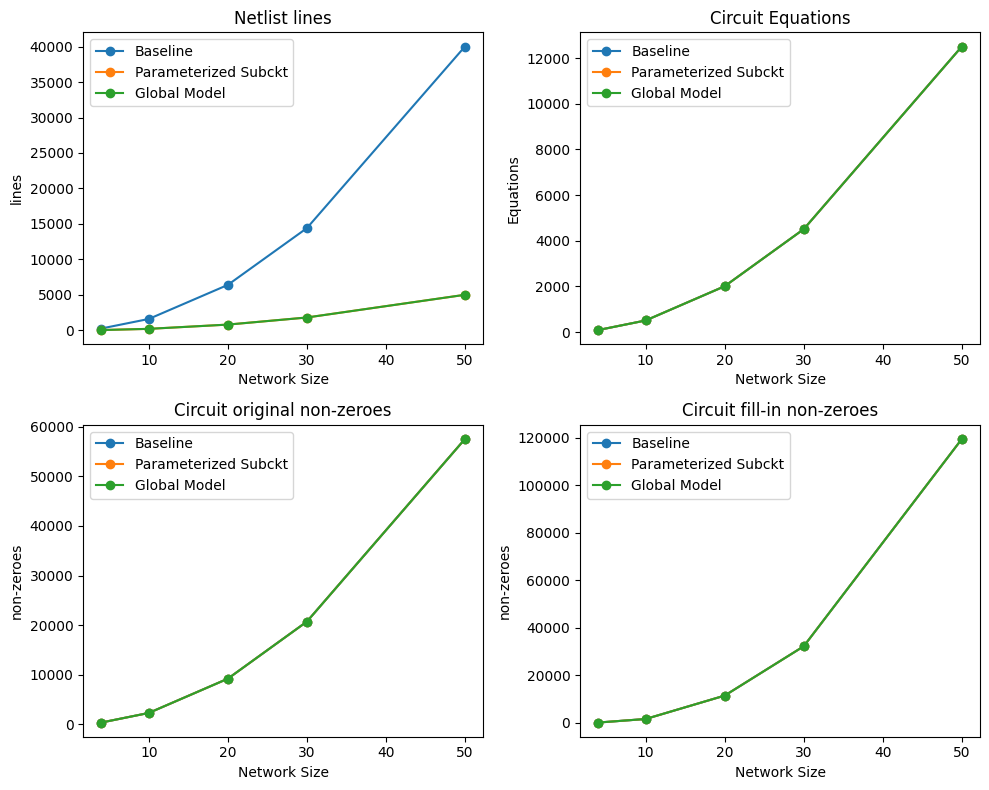

In [20]:
import matplotlib.pyplot as plt

# Data from your output
comp_fields = ['Netlist lines', 'Circuit Equations', 'Circuit original non-zeroes', 'Circuit fill-in non-zeroes']
netlist_metrics = {
    f: ([baseline[str(size)][f] for size in NET_SIZES], [opt1[str(size)][f] for size in NET_SIZES], [opt2[str(size)][f] for size in NET_SIZES])
    for f in comp_fields
}

# Plot configuration
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
titles = list(data.keys())

# Loop through and plot each metric
for i, (title, (baseline_metric, param_metric, global_metric)) in enumerate(netlist_metrics.items()):
    ax = axs[i // 2, i % 2]
    ax.plot(NET_SIZES, baseline_metric, label='Baseline', marker='o')
    ax.plot(NET_SIZES, param_metric, label='Parameterized Subckt', marker='o')
    ax.plot(NET_SIZES, global_metric, label='Global Model', marker='o')
    ax.set_title(title)
    ax.set_xlabel('Network Size')
    ax.set_ylabel(title.split()[-1])
    ax.legend()

plt.tight_layout()
plt.show()


In [23]:
# find factor reduction in num lines
baseline_lines = [baseline[str(size)]['Netlist lines'] for size in NET_SIZES]
param_lines = [opt2[str(size)]['Netlist lines'] for size in NET_SIZES]

line_reduction = [bl / pl for bl, pl in zip(baseline_lines, param_lines)]
line_reduction

[5.717391304347826,
 7.509345794392523,
 7.871007371007371,
 7.9421168687982355,
 7.979058635819705]

In [24]:
# compare total times of runs for each
clock_time_baseline = [sum(baseline[str(size)][f] for f in netlist_fields + loading_fields + matrix_fields) for size in NET_SIZES]
clock_time_opt1 = [sum(opt1[str(size)][f] for f in netlist_fields + loading_fields + matrix_fields) for size in NET_SIZES]
clock_time_opt2 = [sum(opt2[str(size)][f] for f in netlist_fields + loading_fields + matrix_fields) for size in NET_SIZES]

print(clock_time_baseline)
print(clock_time_opt1)
print(clock_time_opt2)

speedups = [clock_time_baseline[i] / (clock_time_opt2[i]+1e-10) for i in range(len(NET_SIZES))]
speedups

[0.0020800000000000007, 0.01568000000000001, 0.13568, 0.6002800000000001, 4.18236]
[0.0015600000000000006, 0.010520000000000005, 0.059720000000000016, 0.217, 1.36312]
[0.0014400000000000003, 0.007360000000000002, 0.05036000000000002, 0.2085200000000001, 1.077]


[1.4444443441358095,
 2.130434753662572,
 2.6942017420687003,
 2.878764625513732,
 3.883342618023831]

In [32]:
baseline['50']['Total analysis time (seconds)']

1.0446

In [33]:
# Determine what portion of the time is spent in each section for netlists of each size

netlist_time_baseline = [sum(baseline[str(size)][f] for f in netlist_fields) / baseline[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]
netlist_time_opt1 = [sum(opt1[str(size)][f] for f in netlist_fields) / opt1[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]
netlist_time_opt2 = [sum(opt2[str(size)][f] for f in netlist_fields) / opt2[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]

print("Netlist operations")
print("Baseline:", netlist_time_baseline)
print("Opt1:", netlist_time_opt1)
print("Opt2:", netlist_time_opt2)

loading_time_baseline = [sum(baseline[str(size)][f] for f in loading_fields) / baseline[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]
loading_time_opt1 = [sum(opt1[str(size)][f] for f in loading_fields) / opt1[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]
loading_time_opt2 = [sum(opt2[str(size)][f] for f in loading_fields) / opt2[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]

print("Loading operations")
print("Baseline:", loading_time_baseline)
print("Opt1:", loading_time_opt1)
print("Opt2:", loading_time_opt2)

matrix_time_baseline = [sum(baseline[str(size)][f] for f in matrix_fields) / baseline[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]
matrix_time_opt1 = [sum(opt1[str(size)][f] for f in matrix_fields) / opt1[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]
matrix_time_opt2 = [sum(opt2[str(size)][f] for f in matrix_fields) / opt2[str(size)]['Total analysis time (seconds)'] for size in NET_SIZES]

print("Matrix operations")
print("Baseline:", matrix_time_baseline)
print("Opt1:", matrix_time_opt1)
print("Opt2:", matrix_time_opt2)

Netlist operations
Baseline: [1.2999999999999996, 1.4519230769230775, 0.8088552915766737, 0.6155147414209763, 0.5515221137277427]
Opt1: [1.529411764705882, 1.4786324786324785, 0.8556701030927831, 0.6081404628890662, 0.47970620863777225]
Opt2: [0.8799999999999998, 1.0093457943925235, 0.47639034627492155, 0.21537179754217886, 0.11017783088493711]
Loading operations
Baseline: [1.15, 1.8653846153846159, 2.213822894168465, 2.3044949250845823, 2.7350947731188966]
Opt1: [0.5882352941176467, 0.4017094017094016, 0.1477663230240549, 0.10800744878957173, 0.10068474809685939]
Opt2: [0.3199999999999999, 0.2523364485981308, 0.1699895068205667, 0.13872109977088112, 0.10367610880719759]
Matrix operations
Baseline: [0.14999999999999997, 0.4519230769230769, 0.640388768898488, 0.7066215563073949, 0.7171740379092476]
Opt1: [0.17647058823529405, 0.3675213675213674, 0.7067583046964487, 0.7270550678371908, 0.7232317049845074]
Opt2: [0.2399999999999999, 0.45794392523364486, 0.6747114375655825, 0.7317225578004

In [61]:
# plt.plot(NET_SIZES[1:], speedups[1:], label="Speedup")
# plt.plot(NET_SIZES, clock_time_baseline, label="Baseline")
# plt.plot(NET_SIZES, clock_time_optim1, label="Optimized")

# plt.xlabel("Netlist number of nodes")
# plt.ylabel("Total time elapsed (s)")
# plt.title("Total time elapsed vs. netlist size")

In [ ]:
# see how long this thing takes just for fun
from helpers import *

test_net = make_test_net(4, instance)

train_inputs = data['inputs']
train_outputs = data['outputs']

NUM_CHECKPOINTS = 20
NUM_ITERATIONS = 100000

e1, e2 = [], []
for E in test_net.edges:
    a, b = list(map(int, E.edge.node_names[:2]))
    e1.append(a)
    e2.append(b)

for i in tqdm.trange(NUM_CHECKPOINTS):
        this_steps = min(
            NUM_ITERATIONS // NUM_CHECKPOINTS, NUM_ITERATIONS - i * (NUM_ITERATIONS // NUM_CHECKPOINTS)
        )
        random_samples = np.random.choice(
            len(train_inputs), size=this_steps, replace=True
        )
        preds = np.empty(this_steps)
        updates = np.empty((this_steps, len(test_net.edges)))

        for j in tqdm.trange(this_steps, leave=False):
            test_net, pred, update = step_network(
                test_net,
                train_inputs[random_samples[j]],
                train_outputs[random_samples[j]],
                e1, 
                e2,
                eta=0.3,
                gamma=1,
            )
            preds[j] = pred.item()
            updates[j] = update